<a href="https://colab.research.google.com/github/Surafel-Getachew/handwritten_digit_recognition/blob/main/handwritten_digit_recognition_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

## Problem statment

use a neural network to recognize two handwritten digits, zero and one. This is a binary classification task. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. You will extend this network to recognize all 10 digits (0-9) in a future assignment.

## Dataset

In [18]:
import numpy as np
from google.colab import drive
drive.mount("/content/drive")

def load_data():
    X = np.load("/content/drive/MyDrive/data/X.npy")
    y = np.load("/content/drive/MyDrive/data/y.npy")
    X = X[0:1000]
    y = y[0:1000]
    return X,y

def load_weights():
    w1 = np.load("data/w1.npy")
    b1 = np.load("data/b1.npy")
    w2 = np.load("data/w2.npy")
    b2 = np.load("data/b2.npy")
    return w1, b1, w2, b2

def sigmoid(x):
    return 1. / (1. + np.exp(-x))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# load datasets
X,y = load_data()

In [21]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)


## Visualizing data

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

## TF, Numpy and Vectorized implementation for forward prop 

### TF Model Implementation

In [36]:
model = Sequential (
    [
        tf.keras.Input(shape=(400,)), # specify input size (optional)
        Dense(units=25,activation="sigmoid"),
        Dense(units=15,activation="sigmoid"),
        Dense(units=1,activation="sigmoid")
    ],
    name="my_model"
)

In [ ]:
model.summary()

In [38]:
L1_num_params = 400 * 25 + 25  # W1 parameters  + b1 parameters
L2_num_params = 25 * 15 + 15   # W2 parameters  + b2 parameters
L3_num_params = 15 * 1 + 1     # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )


L1 params =  10025 , L2 params =  390 ,  L3 params =  16


In [39]:
[layer1,layer2,layer3] = model.layers

In [42]:
w1,b1 = layer1.get_weights()
w2,b2 = layer2.get_weights()
w3,b3 = layer3.get_weights()
print(f"w1 {w1.shape} b1:{b1.shape}")
print(f"w2 {w2.shape} b3:{b2.shape}")
print(f"w3 {w3.shape} b3:{b3.shape}")


w1 (400, 25) b1:(25,)
w2 (25, 15) b3:(15,)
w3 (15, 1) b3:(1,)


In [ ]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.01)
)

model.fit(X,y,epochs=20)

In [48]:
prediction = model.predict(X[0].reshape(1,400))
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400))
print(f" predicting a one {prediction}")

1/1 [==============================] - 0s 80ms/step
 predicting a zero: [[0.00035802]]
1/1 [==============================] - 0s 18ms/step
 predicting a one [[0.99927914]]


In [50]:
if prediction >= 0.5:
  yhat = 1
else:
  yhat = 0

print(f"Prediction after threshold: {yhat}")

Prediction after threshold: 1


Let's compare the predictions vs the labels for a random sample of 64 digits. This takes a moment to run.

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()


### NumPy Model Implementation (Forward Prop in NumPy)

In [53]:
def my_dense (a_in,W,b,g):
  units = W.shape[1]
  a_out = np.zeros(units)

  for i in range(units):
    w = W[:,i]
    z = np.dot(a_in,w) + b[i]
    a_out[i] = g(z)
  return a_out

In [66]:
x_tst = 0.1*np.arange(1,3,1).reshape(2,)  # (1 examples, 2 features) [0.1 0.2]

W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features) [[0.1 0.2 0.3]
                                                                                # [[0.4 0.5 0.6]]
b_tst = 0.1*np.arange(1,4,1).reshape(3,)  # (3 features) [0.1 0.2 0.3]

A_tst = my_dense(x_tst, W_tst, b_tst, sigmoid)

print(A_tst)

[0.54735762 0.57932425 0.61063923]


In [84]:
def my_sequential (x,W1,b1,W2,b2,W3,b3):
  a1 = my_dense(x,W1,b1,sigmoid)
  a2 = my_dense(a1,W2,b2,sigmoid)
  a3 = my_dense(a2,W3,b3,sigmoid)
  return a3

We can copy trained weights and biases from Tensorflow.

In [72]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

In [86]:
# make predictions
prediction = my_sequential(X[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[0,0])
prediction = my_sequential(X[500], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[500,0])

yhat =  0  label=  0
yhat =  1  label=  1


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network implemented in Numpy
    my_prediction = my_sequential(X[random_index], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
    my_yhat = int(my_prediction >= 0.5)

    # Predict using the Neural Network implemented in Tensorflow
    tf_prediction = model.predict(X[random_index].reshape(1,400))
    tf_yhat = int(tf_prediction >= 0.5)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{tf_yhat},{my_yhat}")
    ax.set_axis_off() 
fig.suptitle("Label, yhat Tensorflow, yhat Numpy", fontsize=16)
plt.show()

### Vectorized Numpy implementation

In [105]:
def my_dense_v(A_in,w,b,g,):
  z = np.matmul(A_in,w) + b
  A_out = g(z)

  return A_out


In [ ]:
X_tst = 0.1*np.arange(1,9,1).reshape(4,2) # (4 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(1,3) # (1, 3 features)

A_tst = my_dense_v(X_tst, W_tst, b_tst, sigmoid)
print(A_tst)

In [107]:
def my_sequential_v(X, W1, b1, W2, b2, W3, b3):
    A1 = my_dense_v(X,  W1, b1, sigmoid)
    A2 = my_dense_v(A1, W2, b2, sigmoid)
    A3 = my_dense_v(A2, W3, b3, sigmoid)
    return(A3)

In [108]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

Let's make a prediction with the new model. This will make a prediction on all of the examples at once. Note the shape of the output.

In [109]:
Prediction = my_sequential_v(X, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
Prediction.shape


(1000, 1)

We'll apply a threshold of 0.5 as before, but to all predictions at once.

In [118]:
Yhat = (Prediction >= 0.5).astype(int)
print("predict a zero: ",Yhat[0], "predict a one: ", Yhat[500])

predict a zero:  [0] predict a one:  [1]


Run the following cell to see predictions. This will use the predictions we just calculated above. This takes a moment to run.

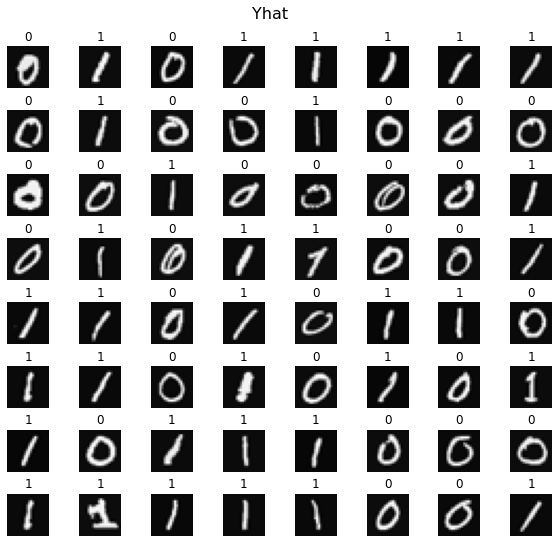

In [134]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
   
    # Display the label above the image
    # ax.set_title(f"{y[random_index,0]}, {Yhat[random_index, 0]}")
    ax.set_title(f"{Yhat[random_index, 0]}")
    ax.set_axis_off() 
# fig.suptitle("Label, Yhat", fontsize=16)
fig.suptitle("Yhat", fontsize=16)
plt.show()